data_test_test_test_test_test Analysis for Activity Recognition data_test_test_testset
Objective

The primary objective of this data analysis task is to explore the activity recognition dataset and extract meaningful insights. This involves:

    Understanding the dataset structure and summarizing its characteristics.
    Analyzing the target variable (activity labels) to understand class distribution.
    Examining the features through statistical summaries, visualizations, and relationships.
    Identifying patterns and trends that will guide feature selection and model training.
    Reducing dimensionality using techniques like PCA for better visualization and understanding.

Steps Performed
1. Dataset Overview

    Loaded the dataset (activity_train.csv) and performed an initial inspection.
    Checked for missing values, dataset size, and data types.
    Provided summary statistics for numerical features.

2. Target Variable Analysis

    Analyzed the distribution of the target variable (Activity), which includes 12 classes representing different physical activities.
    Visualized the class distribution using a bar chart to identify potential imbalances.

3. Feature Exploration

    Selected key features and plotted their distributions using histograms to observe trends and detect outliers.
    Explored relationships between features and activities using boxplots, which highlight variability across classes.

4. Feature Relationships

    Calculated a correlation matrix to identify highly correlated features.
    Visualized the correlations using a heatmap to detect redundancies and potential interactions between features.

5. Dimensionality Reduction

    Applied Principal Component Analysis (PCA) to reduce the dataset’s 561 features to 2 components for visualization.
    Visualized how activities cluster in the reduced feature space to observe separability between classes.



In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Read the dataset
file_path = "activity_train.csv"  # Path to your training dataset
file_path1= "activity_test.csv"
data_train = pd.read_csv(file_path)
data_test = pd.read_csv(file_path1)

# Inspect the dataset
print("Dataset Head:")
print(data_train.head())  # First few rows
print("\nDataset Info:")
print(data_train.info())  # Data types and null values
print("\nSummary Statistics:")
print(data_train.describe())  # Summary statistics

# Check for missing values
missing_values = data_train.isnull().sum()
print("\nMissing Values:")
#print(f" The columns with missing values {missing_values}")  # Show columns with missing values

# Check for missing values in each row
rows_with_missing = data_train.isnull().any(axis=1).sum()

# Print the count of rows with missing values
print(f"\nThe dataset contains {rows_with_missing} rows with missing values.")
#print(f"\nThe dataset contains {len(numerical_features)} numerical features.\n")


# Basic statistics for numerical features
numerical_features = data_train.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Features Summary:")
print([numerical_features])

print(data_train[numerical_features].describe().T)
categorical_features = data_train.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Features:")
print(categorical_features)



Dataset Head:
   tBodyAcc_Mean_1  tBodyAcc_Mean_2  tBodyAcc_Mean_3  tBodyAcc_STD_1  \
0         0.043580        -0.005970        -0.035054       -0.995381   
1         0.039480        -0.002131        -0.029067       -0.998348   
2         0.039978        -0.005153        -0.022651       -0.995482   
3         0.039785        -0.011809        -0.028916       -0.996194   
4         0.038758        -0.002289        -0.023863       -0.998241   

   tBodyAcc_STD_2  tBodyAcc_STD_3  tBodyAcc_Mad_1  tBodyAcc_Mad_2  \
0       -0.988366       -0.937382       -0.995007       -0.988816   
1       -0.982945       -0.971273       -0.998702       -0.983315   
2       -0.977314       -0.984760       -0.996415       -0.975835   
3       -0.988569       -0.993256       -0.996994       -0.988526   
4       -0.986774       -0.993115       -0.998216       -0.986479   

   tBodyAcc_Mad_3  tBodyAcc_Max_1  ...  fBodyGyroJerkMag_Skewness_1  \
0       -0.953325       -0.794796  ...                    -0.314848

In [28]:
# Check for duplicate rows
duplicate_rows = data_train.duplicated()

# Count the total number of duplicate rows
total_duplicates = duplicate_rows.sum()
print(f"\nThe dataset contains {total_duplicates} duplicate rows.")

# Display the duplicate rows (if any)
if total_duplicates > 0:
    print("\nDuplicate Rows:")
    print(data_train[duplicate_rows])




The dataset contains 0 duplicate rows.


In [46]:
missing_values = data_test.isnull().sum()
print("\nMissing Values:")

# Check for duplicate rows
duplicate_rows = data_test.duplicated()

# Count the total number of duplicate rows
total_duplicates = duplicate_rows.sum()
print(f"\nThe dataset contains {total_duplicates} duplicate rows.")

# Display the duplicate rows (if any)
if total_duplicates > 0:
    print("\nDuplicate Rows:")
    print(data_train[duplicate_rows])




Missing Values:

The dataset contains 0 duplicate rows.


C:\Users\abdel\AppData\Local\Temp\ipykernel_20492\2748655082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity', data=data_train, palette='viridis')


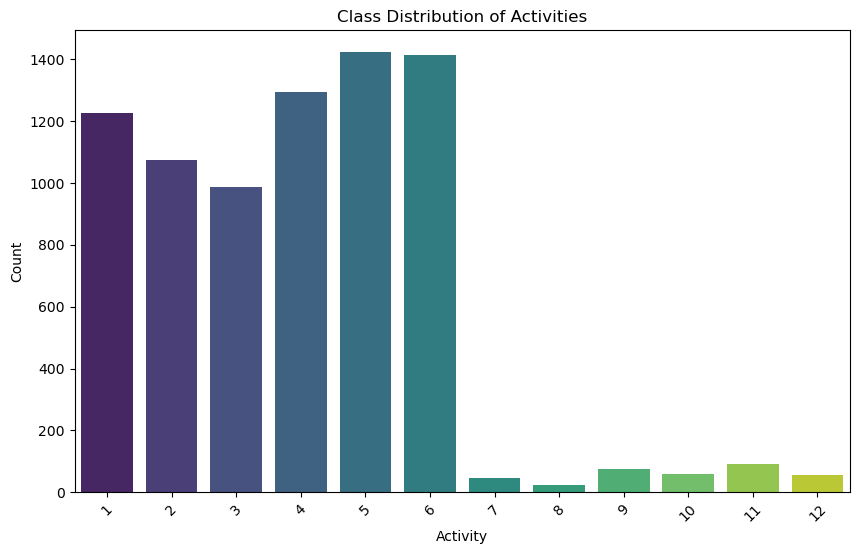

In [50]:
# Target Variable: Analyze Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='activity', data=data_train, palette='viridis')
plt.title('Class Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

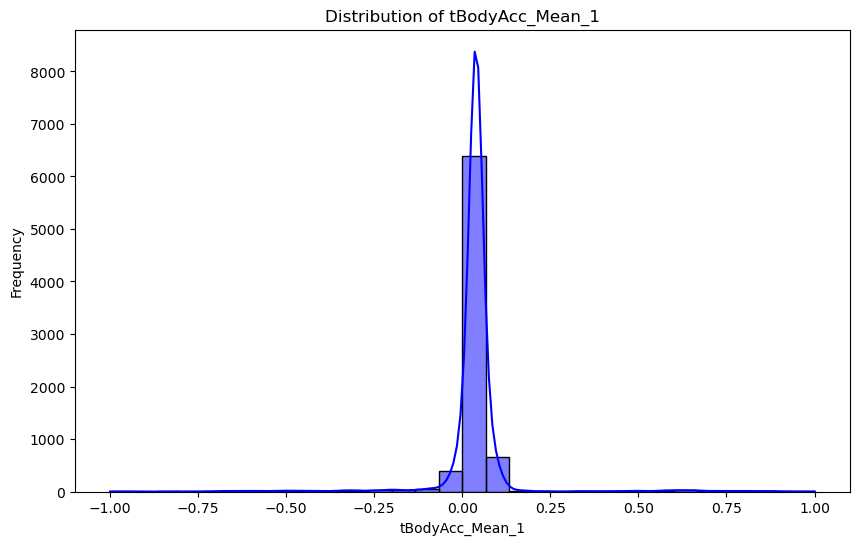

C:\Users\abdel\AppData\Local\Temp\ipykernel_20492\1942351834.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity', y='tBodyAcc_Mean_1', data=data_train, palette='Set3')


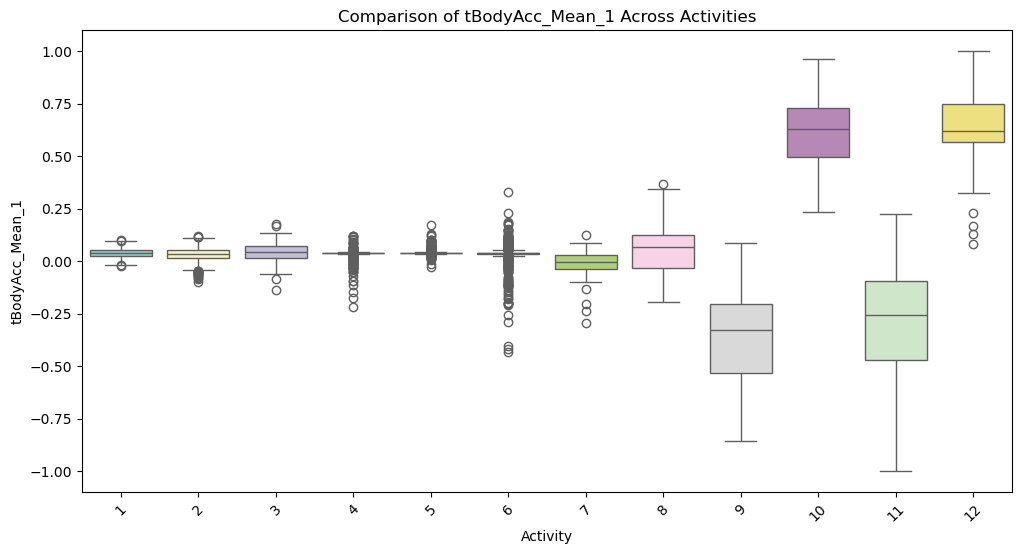

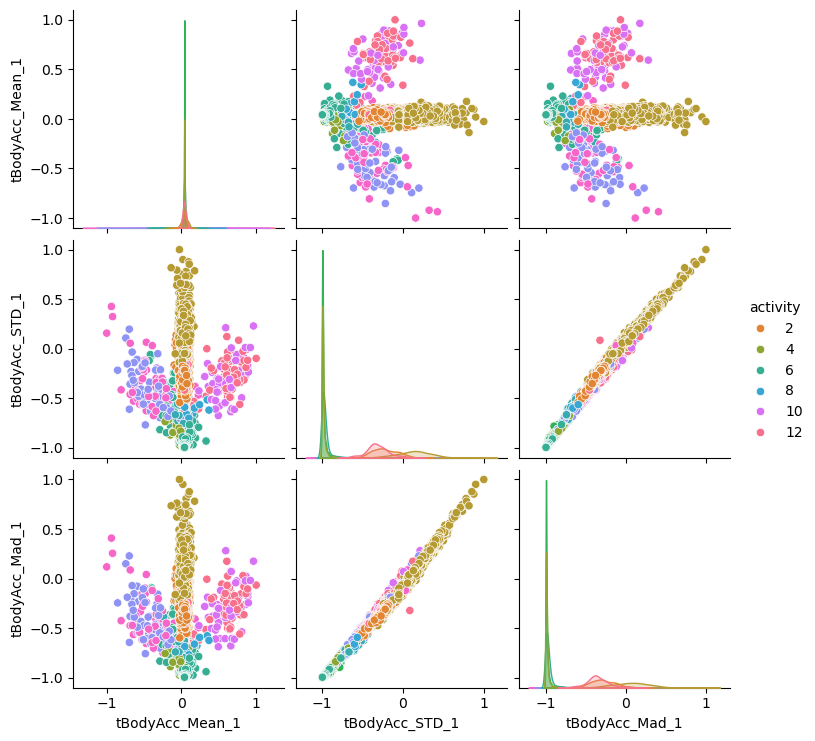

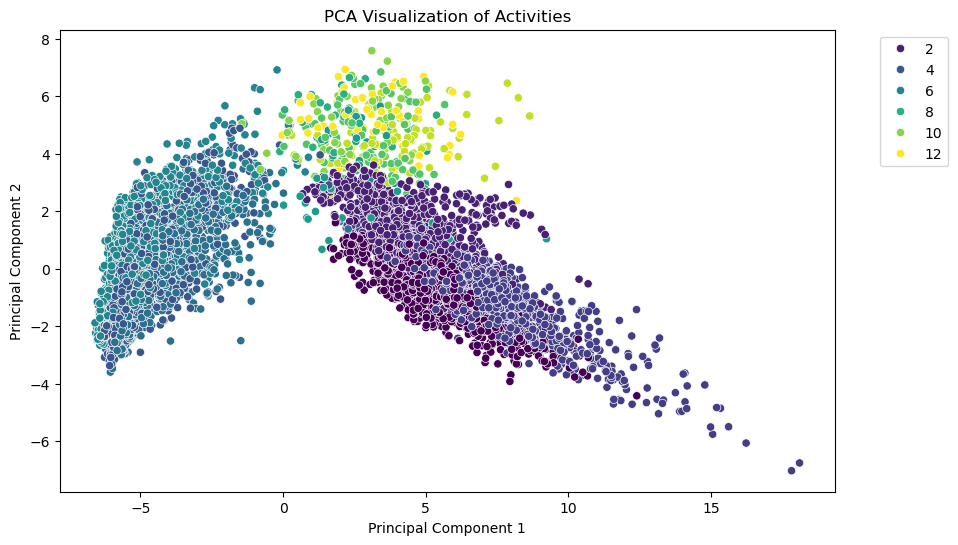

In [30]:
# Feature exploration: Histogram for a representative feature
plt.figure(figsize=(10, 6))
sns.histplot(data_train['tBodyAcc_Mean_1'], kde=True, bins=30, color='blue')
plt.title('Distribution of tBodyAcc_Mean_1')
plt.xlabel('tBodyAcc_Mean_1')
plt.ylabel('Frequency')
plt.show()



# Boxplot: Compare a feature across activities
plt.figure(figsize=(12, 6))
sns.boxplot(x='activity', y='tBodyAcc_Mean_1', data=data_train, palette='Set3')
plt.title('Comparison of tBodyAcc_Mean_1 Across Activities')
plt.xlabel('Activity')
plt.ylabel('tBodyAcc_Mean_1')
plt.xticks(rotation=45)
plt.show()

# Pairplot for selected features
selected_features = ['tBodyAcc_Mean_1', 'tBodyAcc_STD_1', 'tBodyAcc_Mad_1']
pairplot_data = data_train[selected_features + ['activity']]
sns.pairplot(pairplot_data, hue='activity', palette='husl')
plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
features = data_train[numerical_features].drop(columns=['activity']).fillna(0)  # Exclude target variable
principal_components = pca.fit_transform(features)

# Add PCA components to the dataset for visualization
pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_data['Activity'] = data_train['activity']

# Visualize PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='Activity', palette='viridis')
plt.title('PCA Visualization of Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Selected Features for Pairwise Relationships: ['tBodyAcc_STD_2', 'tBodyAcc_STD_3', 'tBodyAcc_STD_1']


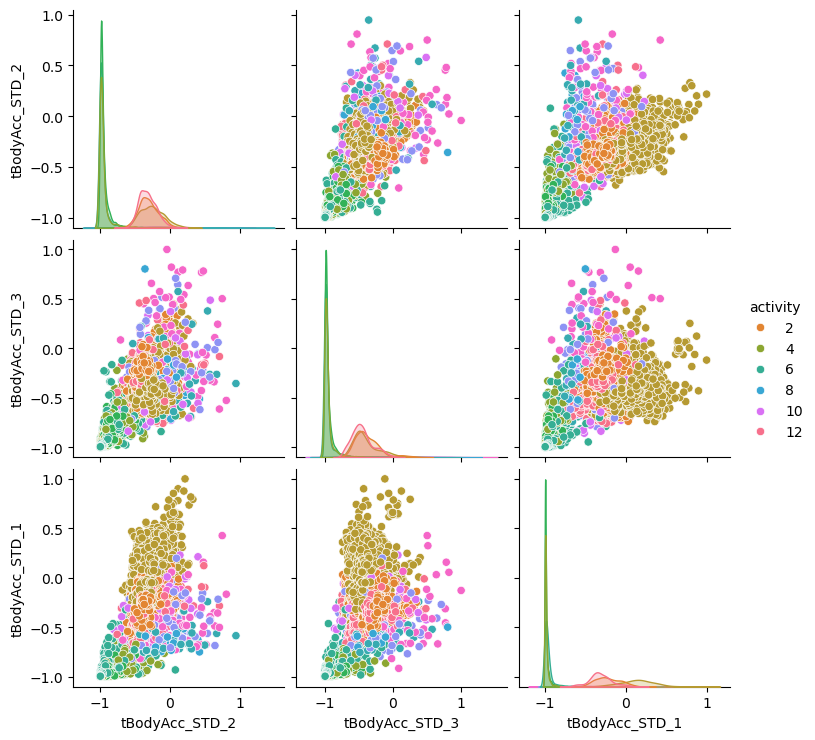

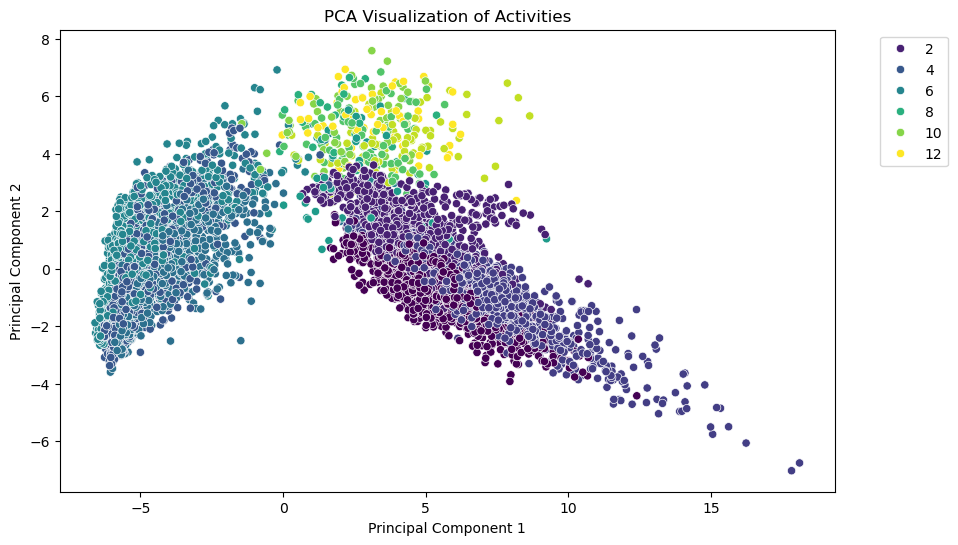

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute correlation matrix
correlation_matrix = data_train.corr()

# Step 2: Select highly correlated features (|correlation| > 0.7) with some diversity
# Extract feature pairs and their correlation values
correlated_pairs = (correlation_matrix.abs()
                    .stack()
                    .reset_index()
                    .rename(columns={0: 'Correlation'}))

# Keep only features with high correlation and exclude duplicates
correlated_pairs = correlated_pairs[correlated_pairs['Correlation'] < 1]  # Exclude self-correlation
correlated_pairs = correlated_pairs[correlated_pairs['Correlation'] > 0.7]
correlated_pairs = correlated_pairs.drop_duplicates(subset=['Correlation'], keep='first')

# Step 3: Select top correlated features dynamically
selected_features = set(correlated_pairs['level_0'].tolist()[:2] + correlated_pairs['level_1'].tolist()[:2])
selected_features = list(selected_features)[:3]  # Keep only 3 features for visualization

print(f"Selected Features for Pairwise Relationships: {selected_features}")

# Step 4: Pairplot for selected features
pairplot_data = data_train[selected_features + ['activity']]
sns.pairplot(pairplot_data, hue='activity', palette='husl')
plt.show()

# Step 5: PCA for dimensionality reduction (for comparison)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
features = data_train.drop(columns=['activity']).fillna(0)  # Exclude target variable
principal_components = pca.fit_transform(features)

# Add PCA components to the dataset for visualization
pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_data['Activity'] = data_train['activity']

# Visualize PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='Activity', palette='viridis')
plt.title('PCA Visualization of Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


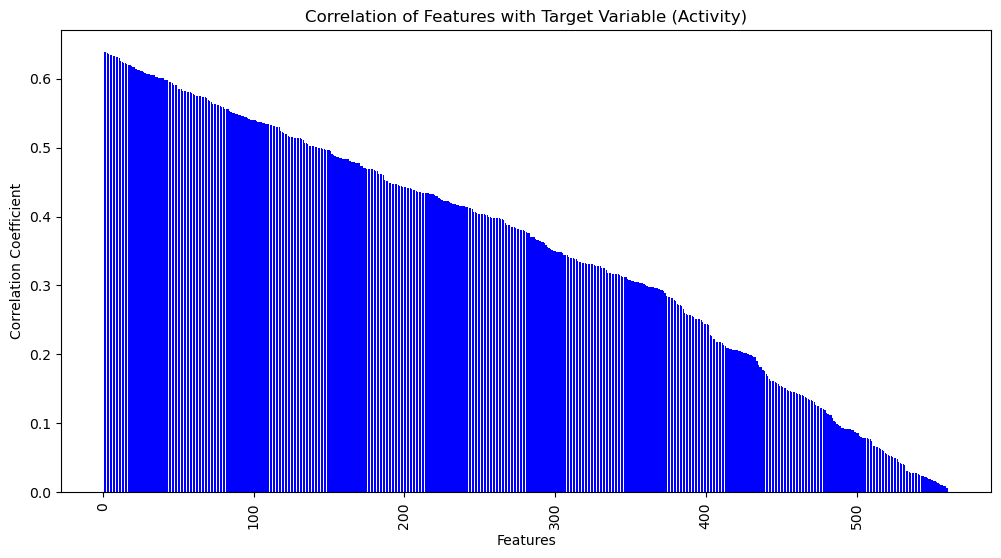

In [31]:
# Compute the correlation matrix
correlation_matrix = data_train.corr()

# Correlation with the target variable (activity)
target_correlation = correlation_matrix['activity'].drop('activity')  # Exclude self-correlation

# Sort correlations by absolute value
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

# Generate sequential feature labels as numbers
feature_labels = [i+1 for i in range(len(sorted_correlation))]

# Plot the bar diagram with a wider figure
plt.figure(figsize=(12, 6))  # Adjust width and height
plt.bar(feature_labels, sorted_correlation.values, color='blue')
plt.title('Correlation of Features with Target Variable (Activity)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


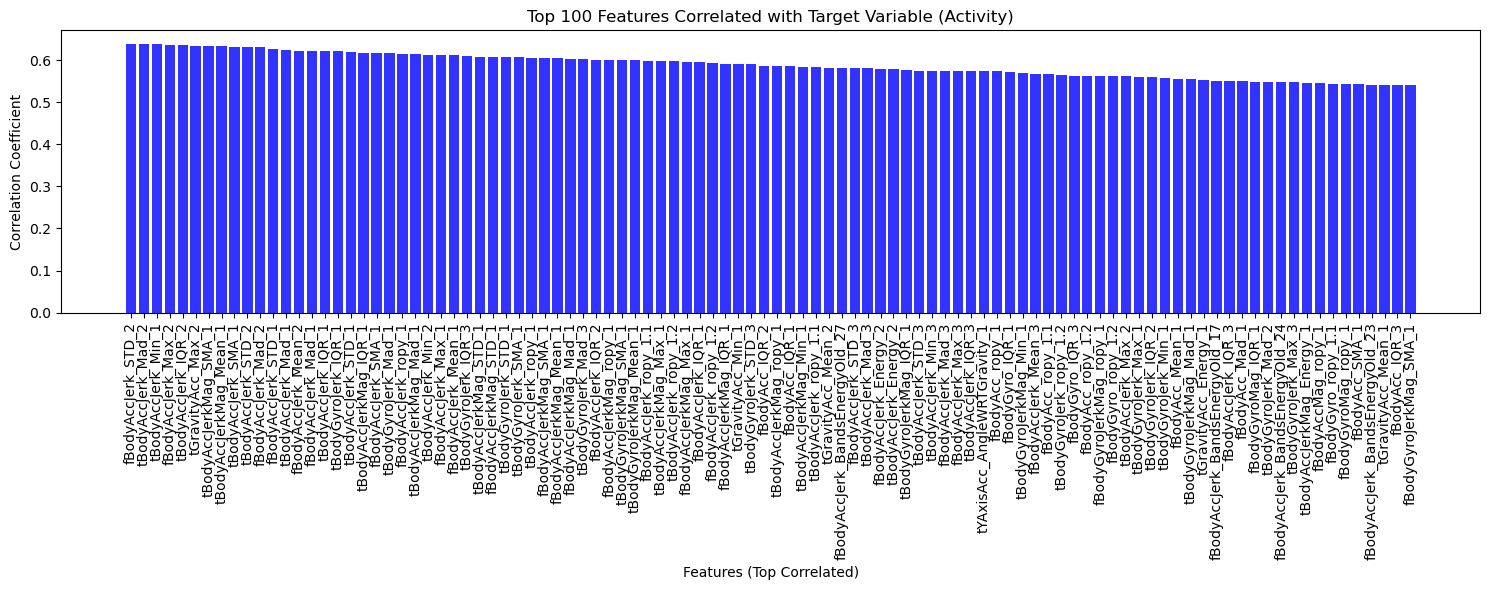

In [32]:
# Compute the correlation matrix
correlation_matrix = data_train.corr()

# Correlation with the target variable (activity)
target_correlation = correlation_matrix['activity'].drop('activity')  # Exclude self-correlation

# Sort correlations by absolute value
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

# Select top N features to display
top_n = 100  # Number of top features to display
top_correlation = sorted_correlation.head(top_n)

# Extract actual feature names
feature_labels = top_correlation.index  # Use feature names as labels

# Plot the bar diagram with actual feature names
plt.figure(figsize=(15, 6))  # Increased figure width for better clarity
plt.bar(feature_labels, top_correlation.values, color='blue', alpha=0.8)  # Solid blue bars with transparency
plt.title(f'Top {top_n} Features Correlated with Target Variable (Activity)')
plt.xlabel('Features (Top Correlated)')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


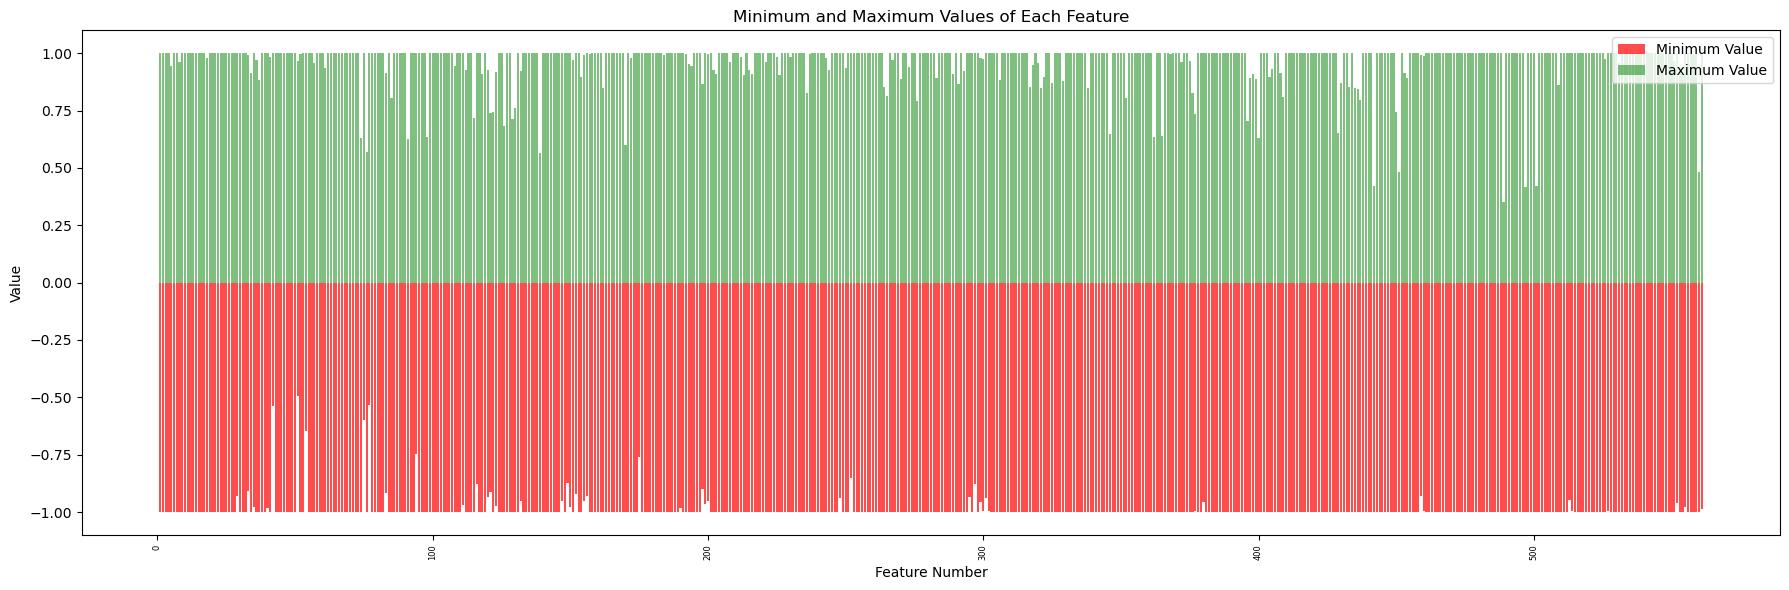

In [33]:
# Exclude the target variable ('activity') and focus on numerical features
features = data_train.drop(columns=['activity'])

# Compute the minimum and maximum values for each feature
feature_min = features.min()
feature_max = features.max()

# Generate ordered numbers for features
feature_numbers = [i+1 for i in range(len(features.columns))]  # Sequential numbers starting from 1

# Plot the bar graph for minimum and maximum values
plt.figure(figsize=(18, 6))

# Plot minimum values as bars
plt.bar(feature_numbers, feature_min, label='Minimum Value', color='red', alpha=0.7)

# Plot maximum values as bars
plt.bar(feature_numbers, feature_max, label='Maximum Value', color='green', alpha=0.5)

plt.title('Minimum and Maximum Values of Each Feature')
plt.xlabel('Feature Number')
plt.ylabel('Value')
plt.legend()
plt.xticks( rotation=90, fontsize=6)  # Ordered feature numbers
plt.tight_layout()
plt.show()


In [34]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X_train = data_train.drop(columns=['activity'])  # Features from train set
y_train = data_train['activity']  # Target from train set

X_test = data_test.drop(columns=['activity'])  # Features from test set
y_test = data_test['activity']  # Target from test set

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform train data
X_test_scaled = scaler.transform(X_test)        # Transform test data using the fitted scaler

# Convert scaled data back into DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print("Scaled Training Data:")
print(X_train_scaled.head())

# Display the first few rows of the scaled test data
print("\nScaled Test Data:")
print(X_test_scaled.head())


Scaled Training Data:
   tBodyAcc_Mean_1  tBodyAcc_Mean_2  tBodyAcc_Mean_3  tBodyAcc_STD_1  \
0         0.047269        -0.053254        -0.187937       -0.897865   
1         0.007072        -0.014852        -0.121357       -0.904585   
2         0.011953        -0.045076        -0.049999       -0.898093   
3         0.010058        -0.111658        -0.119672       -0.899706   
4        -0.000006        -0.016425        -0.063479       -0.904344   

   tBodyAcc_STD_2  tBodyAcc_STD_3  tBodyAcc_Mad_1  tBodyAcc_Mad_2  \
0       -0.963016       -0.765226       -0.887665       -0.951001   
1       -0.948267       -0.870601       -0.896503       -0.935193   
2       -0.932946       -0.912535       -0.891032       -0.913698   
3       -0.963568       -0.938951       -0.892418       -0.950170   
4       -0.958685       -0.938515       -0.895340       -0.944286   

   tBodyAcc_Mad_3  tBodyAcc_Max_1  ...  fBodyGyroJerkMag_MeanFreq_1  \
0       -0.781987       -0.870540  ...                    -

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale train and test data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Display scaled data
print("Scaled Training Data (Min-Max):")
print(X_train_scaled.describe())


Scaled Training Data (Min-Max):
       tBodyAcc_Mean_1  tBodyAcc_Mean_2  tBodyAcc_Mean_3  tBodyAcc_STD_1  \
count      7767.000000      7767.000000      7767.000000     7767.000000   
mean          0.519379         0.499677         0.490923        0.200492   
std           0.050998         0.049987         0.044964        0.220740   
min           0.000000         0.000000         0.000000        0.000000   
25%           0.516019         0.494395         0.485776        0.003930   
50%           0.519487         0.498539         0.490199        0.042899   
75%           0.522000         0.502151         0.494162        0.376987   
max           1.000000         1.000000         1.000000        1.000000   

       tBodyAcc_STD_2  tBodyAcc_STD_3  tBodyAcc_Mad_1  tBodyAcc_Mad_2  \
count     7767.000000     7767.000000     7767.000000     7767.000000   
mean         0.187864        0.154365        0.188057        0.174519   
std          0.188883        0.160821        0.209057        0.1

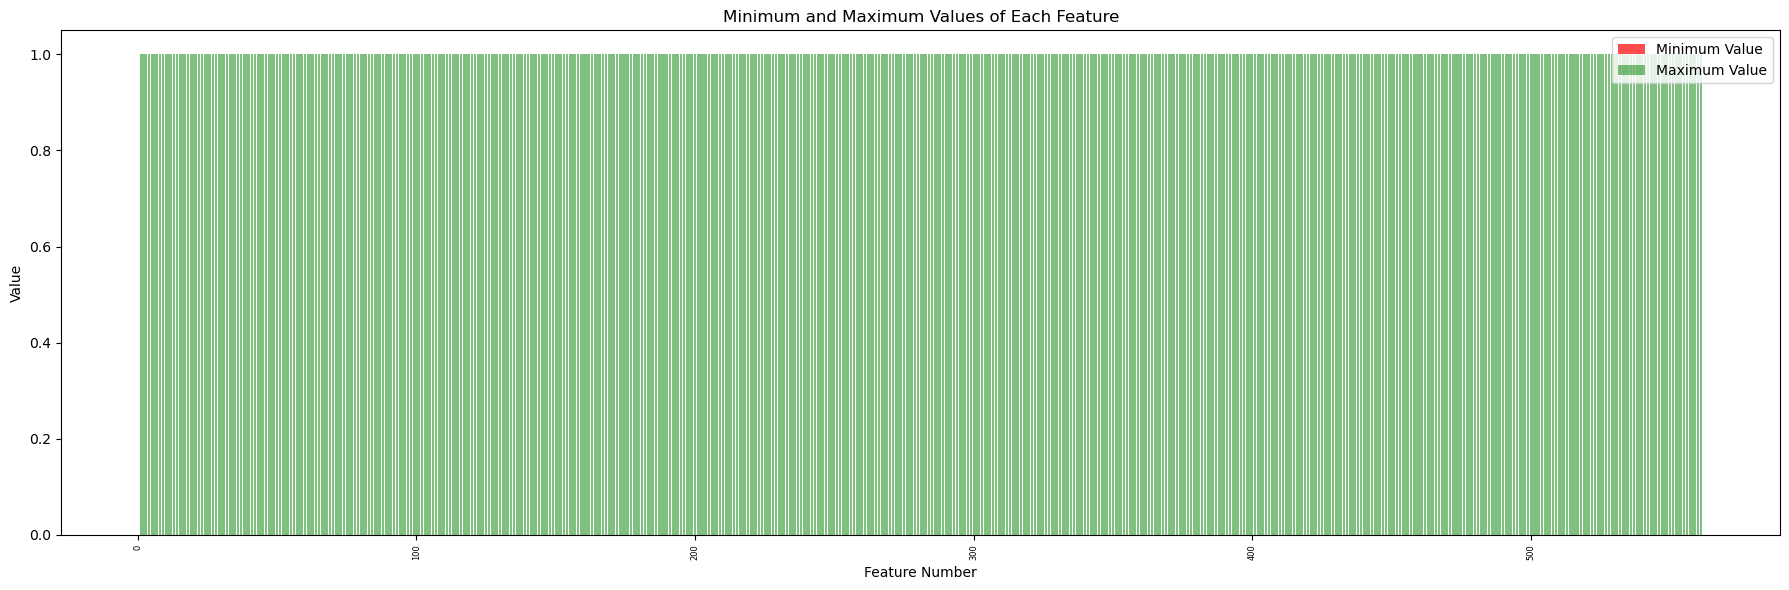

In [36]:
# Exclude the target variable ('activity') and focus on numerical features
features = X_train_scaled

# Compute the minimum and maximum values for each feature
feature_min = features.min()
feature_max = features.max()

# Generate ordered numbers for features
feature_numbers = [i+1 for i in range(len(features.columns))]  # Sequential numbers starting from 1

# Plot the bar graph for minimum and maximum values
plt.figure(figsize=(18, 6))

# Plot minimum values as bars
plt.bar(feature_numbers, feature_min, label='Minimum Value', color='red', alpha=0.7)

# Plot maximum values as bars
plt.bar(feature_numbers, feature_max, label='Maximum Value', color='green', alpha=0.5)

plt.title('Minimum and Maximum Values of Each Feature')
plt.xlabel('Feature Number')
plt.ylabel('Value')
plt.legend()
plt.xticks( rotation=90, fontsize=6)  # Ordered feature numbers
plt.tight_layout()
plt.show()


Original class distribution: Counter({5: 1423, 6: 1413, 4: 1293, 1: 1226, 2: 1073, 3: 987, 11: 90, 9: 75, 10: 60, 12: 57, 7: 47, 8: 23})


C:\Users\abdel\AppData\Local\Temp\ipykernel_20492\1910609281.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y_train).keys()), y=list(Counter(y_train).values()), palette='viridis')


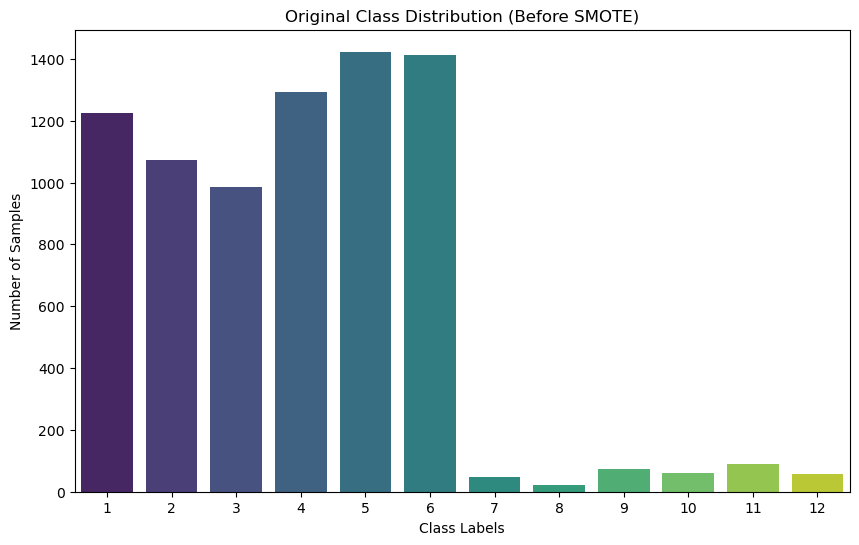

Resampled class distribution: Counter({5: 1423, 7: 1423, 4: 1423, 8: 1423, 11: 1423, 6: 1423, 10: 1423, 9: 1423, 12: 1423, 1: 1423, 3: 1423, 2: 1423})


C:\Users\abdel\AppData\Local\Temp\ipykernel_20492\1910609281.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y_train_resampled).keys()), y=list(Counter(y_train_resampled).values()), palette='viridis')


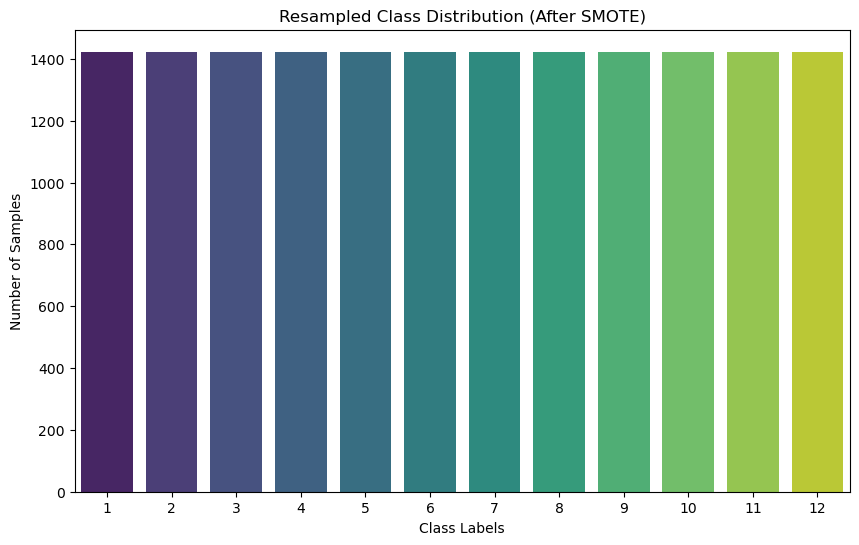

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Display original class distribution
print("Original class distribution:", Counter(y_train))

# Plot original class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(Counter(y_train).keys()), y=list(Counter(y_train).values()), palette='viridis')
plt.title("Original Class Distribution (Before SMOTE)")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.show()

# Apply SMOTE for oversampling on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Display new class distribution
print("Resampled class distribution:", Counter(y_train_resampled))

# Plot resampled class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(Counter(y_train_resampled).keys()), y=list(Counter(y_train_resampled).values()), palette='viridis')
plt.title("Resampled Class Distribution (After SMOTE)")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.show()

# Optional: Convert resampled data back to DataFrame for readability
#X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)


In [38]:
# Relabel target classes to start from 0 to work on xgboost
y_train_resampled = y_train_resampled - 1
y_test = y_test - 1


In [39]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Dictionary to store results
results_summary = []

# List of models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Train, evaluate, and store results for each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)  # Convert to dict
    
    # Append results
    results_summary.append({
        "Model": model_name,
        "Cross-Validation Accuracy": f"{np.mean(cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')):.4f}",
        "Test Accuracy": f"{accuracy:.4f}",
        "Precision (Macro Avg)": f"{class_report['macro avg']['precision']:.4f}",
        "Recall (Macro Avg)": f"{class_report['macro avg']['recall']:.4f}",
        "F1-Score (Macro Avg)": f"{class_report['macro avg']['f1-score']:.4f}"
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results_summary)

# Print results table
print("\nModel Evaluation Results:")
print(results_df)

# Confusion Matrix for the best model (e.g., XGBoost in this case)
best_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)
y_pred_best = best_model.predict(X_test_scaled)

print("\nConfusion Matrix for Best Model (XGBoost):")
print(confusion_matrix(y_test, y_pred_best))



Training Random Forest...

Training XGBoost...

Training k-Nearest Neighbors...

Training Naive Bayes...

Model Evaluation Results:
                 Model Cross-Validation Accuracy Test Accuracy  \
0        Random Forest                    0.9800        0.9197   
1              XGBoost                    0.9821        0.9292   
2  k-Nearest Neighbors                    0.9696        0.8899   
3          Naive Bayes                    0.7389        0.7185   

  Precision (Macro Avg) Recall (Macro Avg) F1-Score (Macro Avg)  
0                0.8352             0.8414               0.8367  
1                0.8430             0.8561               0.8469  
2                0.7877             0.8241               0.7966  
3                0.6267             0.6600               0.6145  

Confusion Matrix for Best Model (XGBoost):
[[488   6   2   0   0   0   0   0   0   0   0   0]
 [ 37 428   6   0   0   0   0   0   0   0   0   0]
 [ 10  35 375   0   0   0   0   0   0   0   0   0]
 [  0   0

In [40]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the resampled training data
X_train_scaled =X_train_resampled

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_resampled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# Step 3: Hyperparameter tuning for each model
# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Step 4: Train and tune models using GridSearchCV
models_with_params = {
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid_xgb),
    "k-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn),
    "Naive Bayes": (GaussianNB(), None)  # Naive Bayes has no major hyperparameters to tune
}

# Dictionary to store results
tuning_results = []

for model_name, (model, param_grid) in models_with_params.items():
    print(f"\nTuning Hyperparameters for {model_name}...")
    if param_grid:  # If the model has hyperparameters to tune
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_pca, y_train_resampled)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:  # For models without hyperparameters (like Naive Bayes)
        best_model = model.fit(X_train_pca, y_train_resampled)

    # Evaluate the tuned model on the test set
    y_pred = best_model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Append results
    tuning_results.append({
        "Model": model_name,
        "Test Accuracy": f"{test_accuracy:.4f}"
    })

# Step 5: Display results
tuning_results_df = pd.DataFrame(tuning_results)
print("\nHyperparameter Tuning Results:")
print(tuning_results_df)


Original number of features: 561
Reduced number of features after PCA: 70

Tuning Hyperparameters for Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

Tuning Hyperparameters for XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Tuning Hyperparameters for k-Nearest Neighbors...


c:\Users\abdel\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for k-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}

Tuning Hyperparameters for Naive Bayes...

Hyperparameter Tuning Results:
                 Model Test Accuracy
0        Random Forest        0.8966
1              XGBoost        0.9121
2  k-Nearest Neighbors        0.8637
3          Naive Bayes        0.8624


Original number of features: 561
Reduced number of features after PCA: 195

Tuning Hyperparameters for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

Confusion Matrix for Random Forest:
[[480   4  12   0   0   0   0   0   0   0   0   0]
 [ 26 437   8   0   0   0   0   0   0   0   0   0]
 [ 25  35 360   0   0   0   0   0   0   0   0   0]
 [  0   2   0 428  78   0   0   0   0   0   0   0]
 [  0   1   0  26 528   0   0   0   1   0   0   0]
 [  0   1   0   3   4 537   0   0   0   0   0   0]
 [  0   3   0   0   1   0  17   0   1   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0  10   0]
 [  0   0   0   0   0   0   0   0   0  18   1   6]
 [  1   0   0   1   0   1   0   0   7   0  39   0]
 [  1   0   0   0   0   1   0   0   0   4   2  19]]


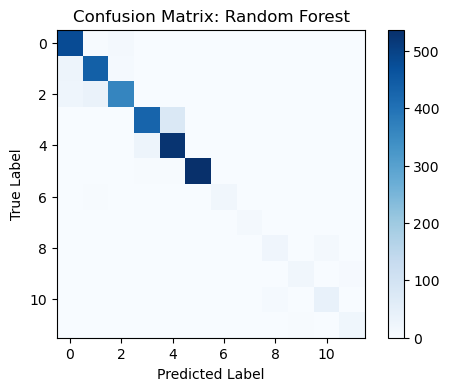


Tuning Hyperparameters for XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Confusion Matrix for XGBoost:
[[482   3  11   0   0   0   0   0   0   0   0   0]
 [ 25 431  11   0   0   0   4   0   0   0   0   0]
 [ 20  43 357   0   0   0   0   0   0   0   0   0]
 [  1   0   0 453  53   0   0   1   0   0   0   0]
 [  1   1   0  14 539   0   1   0   0   0   0   0]
 [  0   1   0   0   0 544   0   0   0   0   0   0]
 [  0   2   0   1   0   0  19   1   0   0   0   0]
 [  0   0   0   0   0   0   1   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0  10   0]
 [  0   0   0   0   0   0   0   0   0  17   2   6]
 [  0   0   0   1   0   0   2   0   9   2  35   0]
 [  0   1   0   0   0   0   0   0   0   5   3  18]]


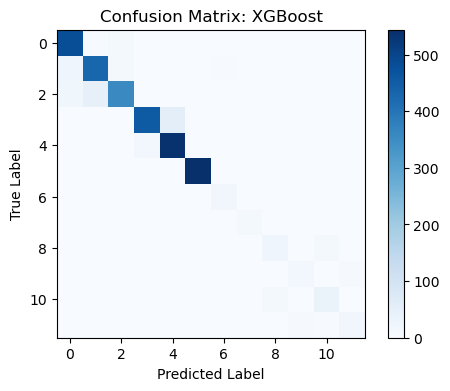


Tuning Hyperparameters for k-Nearest Neighbors...
Best Parameters for k-Nearest Neighbors: {'n_neighbors': 5, 'weights': 'distance'}

Confusion Matrix for k-Nearest Neighbors:
[[471   6  19   0   0   0   0   0   0   0   0   0]
 [ 20 426  23   0   0   0   2   0   0   0   0   0]
 [ 32  41 347   0   0   0   0   0   0   0   0   0]
 [  0   2   0 427  74   0   2   3   0   0   0   0]
 [  0   1   0  62 488   0   5   0   0   0   0   0]
 [  0   1   0   5   1 537   1   0   0   0   0   0]
 [  0   1   0   0   0   0  19   1   1   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27   0   5   0]
 [  0   0   0   0   0   0   0   0   0  19   1   5]
 [  0   1   0   0   1   0   1   0  15   0  31   0]
 [  0   0   0   0   0   0   1   0   1  12   1  12]]


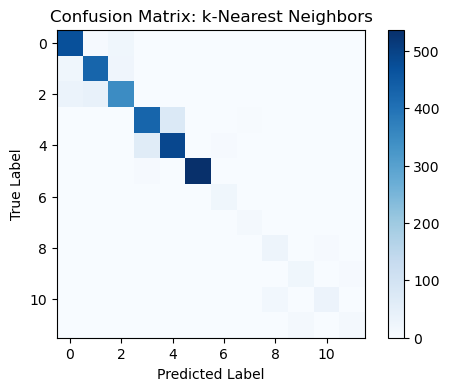


Tuning Hyperparameters for Naive Bayes...


c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix for Naive Bayes:
[[370  35  91   0   0   0   0   0   0   0   0   0]
 [ 19 394  56   0   0   0   2   0   0   0   0   0]
 [ 47  71 302   0   0   0   0   0   0   0   0   0]
 [  1   2  23 415  60   0   0   0   0   0   7   0]
 [  1   6  21  18 508   0   0   0   0   0   2   0]
 [  0   0  37   0   0 508   0   0   0   0   0   0]
 [  0   6   4   0   0   0   3   0   1   0   9   0]
 [  0   0   2   0   0   0   3   0   1   0   4   0]
 [  0   0   8   0   0   0   0   0   9   0  15   0]
 [  0   0   5   0   0   0   0   0   0   4  11   5]
 [  2   1  12   0   0   0   0   0   2   0  32   0]
 [  1   0  11   0   0   0   0   0   0   1   7   7]]


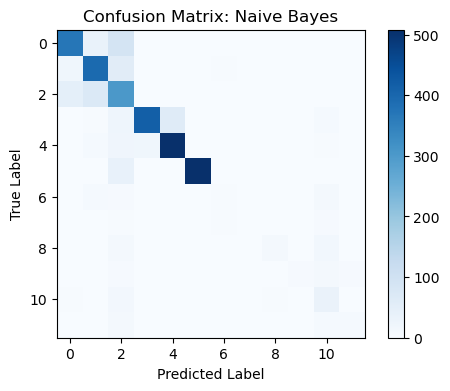


Final Model Evaluation Results:
                 Model Test Accuracy Precision (Macro Avg) Recall (Macro Avg)  \
0        Random Forest        0.9156                0.8809             0.8480   
1              XGBoost        0.9254                0.8345             0.8392   
2  k-Nearest Neighbors        0.8899                0.7888             0.8242   
3          Naive Bayes        0.8071                0.6503             0.5374   

  F1-Score (Macro Avg) Cross-Validation Accuracy Cross-Validation Error  
0               0.8617                    0.9705                 0.0295  
1               0.8355                    0.9775                 0.0225  
2               0.7976                    0.9703                 0.0297  
3               0.5532                    0.8714                 0.1286  


In [44]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Standardize the resampled training data
X_train_scaled = X_train_resampled  # Assuming data is already scaled
X_test_scaled = X_test_scaled

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.995)  # Retain 99.5% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_resampled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# Step 3: Hyperparameter tuning for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Models with hyperparameter grids
models_with_params = {
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid_xgb),
    "k-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn),
    "Naive Bayes": (GaussianNB(), None)  # Naive Bayes has no hyperparameters to tune
}

# Step 4: Train and evaluate models
results_summary = []

for model_name, (model, param_grid) in models_with_params.items():
    print(f"\nTuning Hyperparameters for {model_name}...")
    
    if param_grid:  # Models with hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_pca, y_train_resampled)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:  # Naive Bayes (no hyperparameter tuning)
        best_model = model.fit(X_train_pca, y_train_resampled)
    
    # Cross-validation accuracy
    cv_scores = cross_val_score(best_model, X_train_pca, y_train_resampled, cv=5, scoring='accuracy')
    cv_accuracy = np.mean(cv_scores)
    cv_error = 1 - cv_accuracy
    
    # Predict on the test set
    y_pred = best_model.predict(X_test_pca)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    
    # Append results
    results_summary.append({
        "Model": model_name,
        "Test Accuracy": f"{accuracy:.4f}",
        "Precision (Macro Avg)": f"{precision:.4f}",
        "Recall (Macro Avg)": f"{recall:.4f}",
        "F1-Score (Macro Avg)": f"{f1_score:.4f}",
        "Cross-Validation Accuracy": f"{cv_accuracy:.4f}",
        "Cross-Validation Error": f"{cv_error:.4f}"
    })

    # Confusion Matrix
    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot Confusion Matrix as simple grid
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Step 5: Display results
results_df = pd.DataFrame(results_summary)
print("\nFinal Model Evaluation Results:")
print(results_df)


In [48]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Step 1: Standardize the resampled training data (Assumed already scaled)
X_train_scaled = X_train_resampled
X_test_scaled = X_test_scaled

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.999)  # Retain 99.9% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_resampled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# Step 3: Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

models_with_params = {
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid_xgb),
    "k-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn),
    "Naive Bayes": (GaussianNB(), None)  # No hyperparameters to tune
}

# Step 4: Train and evaluate models
results_summary = []

for model_name, (model, param_grid) in models_with_params.items():
    print(f"\nTuning Hyperparameters for {model_name}...")
    
    if param_grid:  # Perform GridSearch for models with tunable parameters
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_pca, y_train_resampled)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:  # Naive Bayes (no hyperparameters to tune)
        best_model = model.fit(X_train_pca, y_train_resampled)
    
    # Predict on the test set
    y_pred = best_model.predict(X_test_pca)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    
    # Append results
    results_summary.append({
        "Model": model_name,
        "Test Accuracy": f"{accuracy:.2%}",
        "Precision (Macro Avg)": f"{precision:.2%}",
        "Recall (Macro Avg)": f"{recall:.2%}",
        "F1-Score (Macro Avg)": f"{f1_score:.2%}"
    })

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

# Step 5: Display results
results_df = pd.DataFrame(results_summary)
print("\nFinal Model Evaluation Results:")
print(results_df)


Original number of features: 561
Reduced number of features after PCA: 283

Tuning Hyperparameters for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

Confusion Matrix for Random Forest:
[[482   1  13   0   0   0   0   0   0   0   0   0]
 [ 32 432   7   0   0   0   0   0   0   0   0   0]
 [ 18  34 368   0   0   0   0   0   0   0   0   0]
 [  0   2   0 417  86   3   0   0   0   0   0   0]
 [  0   0   0  20 535   0   0   0   0   0   1   0]
 [  0   1   0   1   0 543   0   0   0   0   0   0]
 [  1   1   0   1   2   0  17   0   0   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0  10   0]
 [  1   0   0   0   0   0   0   0   0  17   0   7]
 [  1   2   0   1   0   2   0   0   6   0  37   0]
 [  0   0   1   0   1   0   0   0   0   2   3  20]]

Tuning Hyperparameters for XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

C

c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
